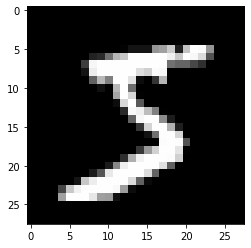

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


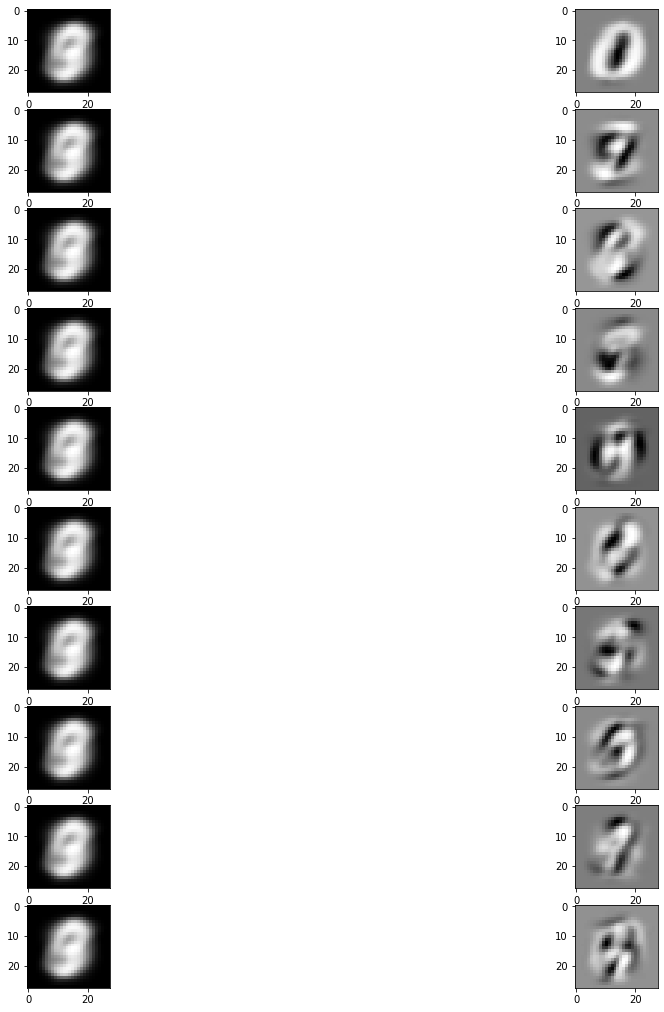

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


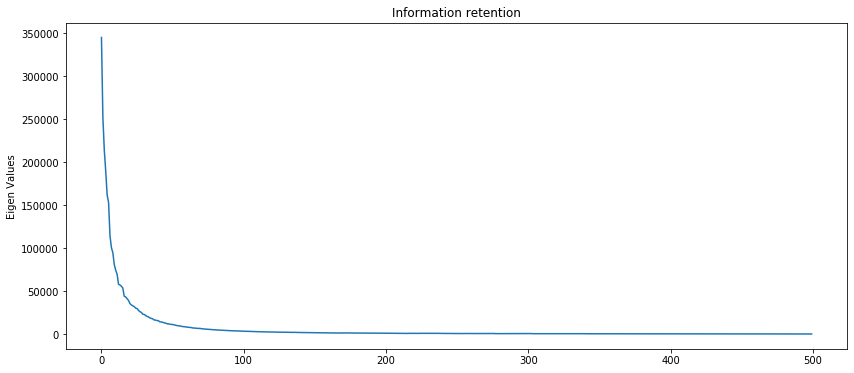

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


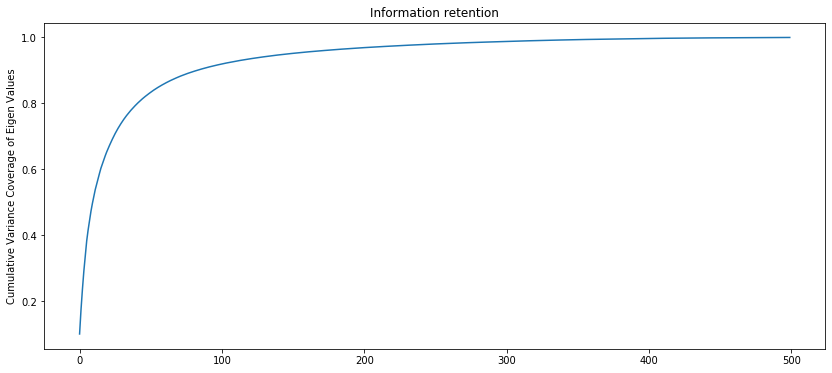

The variance covered using 500 principal components: 0.9993983059547231%
3436023.412205308
[5180317.51704246, 5742408.094486173, 5610573.840507217, 5694847.683671418, 4977033.955185778, 5681012.463269301, 5448912.296660787, 5741902.289118059, 5562274.176973586, 5718495.139318221]
5535777.7456233
the reconstruction error of first 10 PCs of mean image: 3625338.305732937


In [90]:
# CS 181, Spring 2020
# Homework 5: Principal Component Analysis

import numpy as np
import matplotlib.pyplot as plt


# Your code here. You may change anything below this line.
class PCA(object):
    # d is the number of principal components
    def __init__(self, d):
        self.d = d

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images. This method should apply PCA to a dataset X.
    def apply(self, X):
        self.data=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        mean=np.mean(self.data, axis=0)
        mean_centered=self.data-mean 
        covariance_matrix=np.cov(mean_centered.T)
        self.EigVal, self.EigVec=np.linalg.eig(covariance_matrix)
        
        #Projecting data on Eigen vector directions resulting to Principal Components 
        average_PC = self.EigVec.T.dot(mean.T)
#         average_PC=np.mean(PC,axis=1)
        
        tenPC_reconstructed_img=[(self.EigVec[:,i].dot(average_PC[i])).T.astype(float) for i in range(10)]
        ten_first_img=(self.EigVec[:,:10].dot(average_PC[:10])).T.astype(float)
        return mean,tenPC_reconstructed_img,ten_first_img

    def plot(self):
        
        plt.figure(figsize=(14,6))
        
        plt.plot(range(len(self.EigVal[:self.d])),self.EigVal[:self.d])
        plt.ylabel('Eigen Values')
        plt.title('Information retention');
        plt.show()
        
        cumulative_Eigen_coverage= []
        cumulative_coverage=0
        for i in range(self.d):
            cumulative_coverage+=float(self.EigVal[i]/sum(self.EigVal))
            cumulative_Eigen_coverage.append(cumulative_coverage)
        
        plt.figure(figsize=(14,6))
        plt.plot(range(len(self.EigVal[:self.d])),cumulative_Eigen_coverage)
        plt.ylabel('Cumulative Variance Coverage of Eigen Values')
        plt.title('Information retention');
        plt.show()
        print(f'The variance covered using {self.d} principal components: {cumulative_Eigen_coverage[-1]}%')
        
      
    
def calculate_reconstruction_error(representative_img,pics):
    distance_imgs=np.square(pics-representative_img)
    return np.sum(np.sum(distance_imgs,axis=0))/(pics.shape[0])
    
# This line loads the images for you. Don't change it!
pics = np.load("data/images.npy")

plt.figure()
plt.imshow(pics[0].reshape(28,28), cmap='Greys_r')
plt.show()

fig, axs = plt.subplots(10,2,figsize=(18, 18))
pca=PCA(500)
mean_img, ten_reconstructed_imgs,ten_first_img=pca.apply(pics)
for i in range(10):
    axs[i,0].imshow(mean_img.reshape(28,28), cmap='Greys_r')
    axs[i,1].imshow(ten_reconstructed_imgs[i].reshape(28,28), cmap='Greys_r')
plt.show()
pca.plot()
pics=pics.reshape(pics.shape[0],pics.shape[1]*pics.shape[2])

mean_rec_error=calculate_reconstruction_error(mean_img.reshape(1,784),pics)
                                            
pc_rec_errors=[calculate_reconstruction_error(ten_reconstructed_imgs[i].reshape(1,784),pics)
               for i in range(10)]

tenfirst_rec_error=calculate_reconstruction_error(ten_first_img.reshape(1,784),pics)

print(mean_rec_error)
print(pc_rec_errors)

print(np.mean(pc_rec_errors))

print(f'the reconstruction error of first 10 PCs of mean image: {tenfirst_rec_error}')
